# **Projeto de Redes Neurais e Aprendizado Profundo (SCC0270)**

### Implementação e avaliação do modelo MobileNet, utilizando uma base de dados que armazena 5000 imagens diferentes de 5 classes de flores (Lírio, Lótus, Orquídea, Girassol e Tulípa).


### **Membros:**

*   Gustavo Silva de Oliveira             - 12567231
*   Maria Victória Brandão Barros         - 12608692
*   Pedro Henrique Fidelis Prata Miranda  - 12559510




### **Arquitetura do modelo:**

O modelo MobileNet se destaca por, diferentemente das arquiteturas comuns que utilizam a convolução convencional, utilizar uma série de convoluções depthwise separáveis (que combina convoluções depthwise e pointwise no seu funcionamento) para gerar uma rede neural mais leve que possa trabalhar bem em um contexto onde o poder computacional é mais limitado (celulares, carros automáticos, robôs, entre outras aplicações tecnológicas atuais).

### **Exemplo do funcionamento de uma convolução normal:**



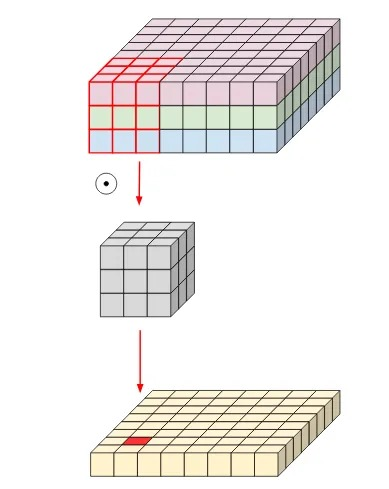


### **Exemplo do funcionamento de uma convolução depthwise e de uma pointwise:**

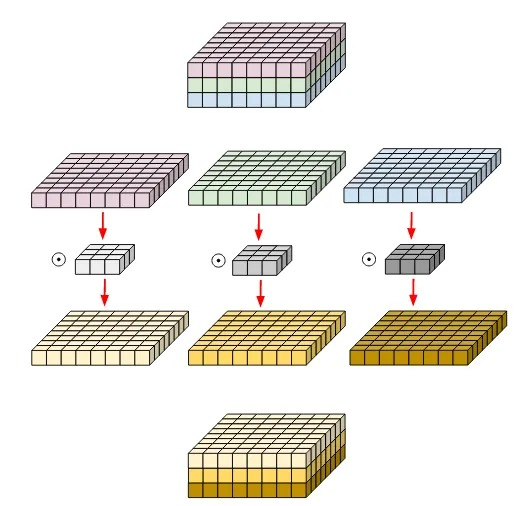
------------------------------------------
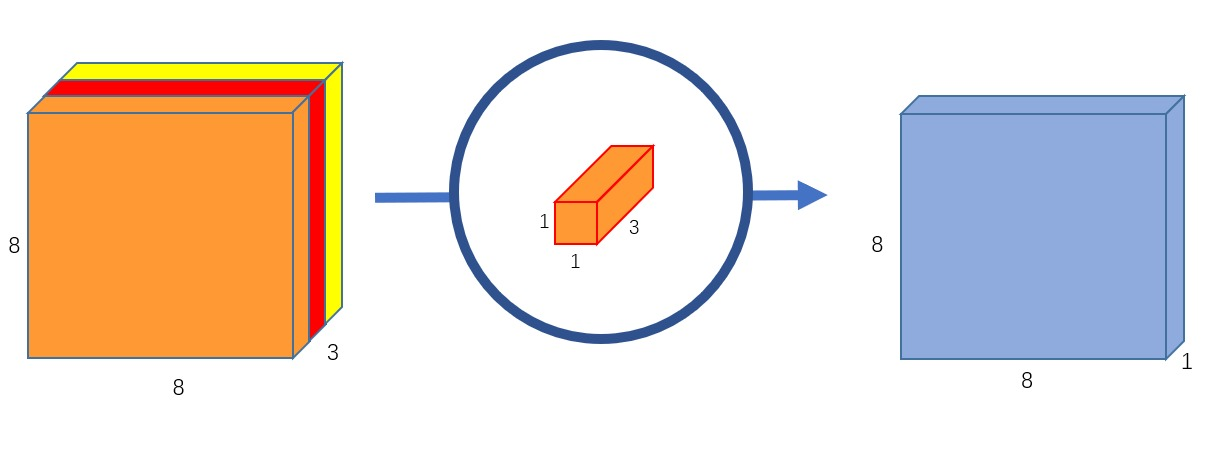



## **Exemplo do funcionamento de uma convolução depthwise separável, que combina as duas anteriores:**

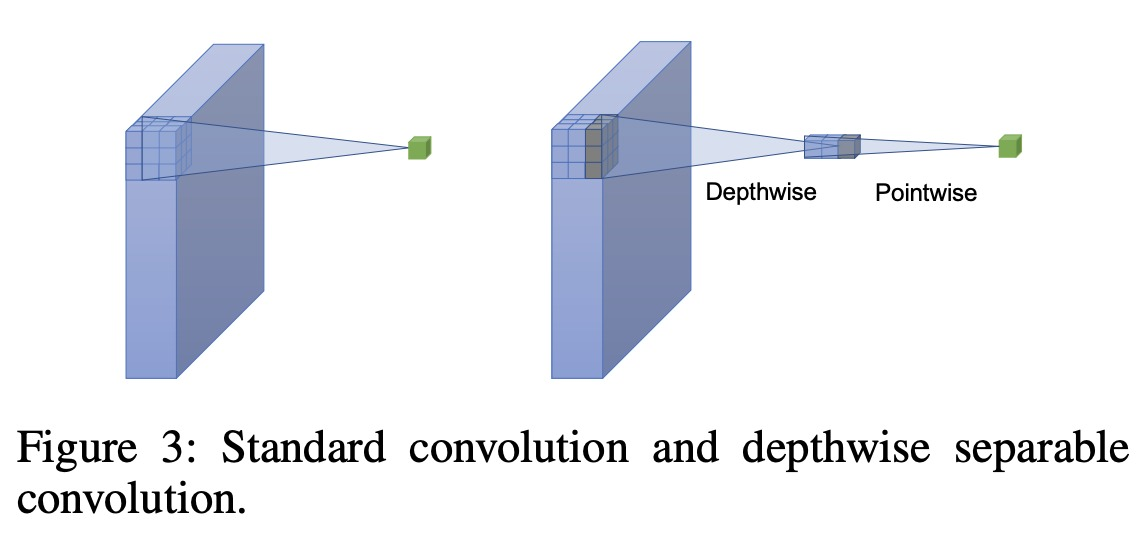

### Leitura da base de dados:

In [ ]:
# imports utilizados na aplicação

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision.transforms import ToTensor
from torchvision.datasets import ImageFolder
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import requests
from io import BytesIO
import zipfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import torchvision.datasets as datasets
from torch.utils.data.dataset import random_split
import os
import numpy as np

In [ ]:
# importando o drive para a leitura da biblioteca

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# utilizando a GPU do google

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
# lendo a nossa base de dados, utilizamos o dataset referente aos tipos de flores, com 5000 imagens diferentes.

zip_path = '/content/drive/MyDrive/flores.zip'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('flores')

transform = transforms.Compose([
    transforms.Resize((224, 224)),  # reformulamos o tamanho das imagens para se adequar ao modelo do artigo
    transforms.ToTensor()
])
dataset_velho = ImageFolder('flores/flower_images', transform=transform)

In [ ]:
# separando o nosso dataset em treino e teste (80% e 20%) e selecionando o tamanho
# adequado dos nossos batches (10)

train_ratio = 0.8
test_ratio = 1 - train_ratio

train_size = int(train_ratio * len(dataset_velho))
test_size = len(dataset_velho) - train_size

train_set, test_set = random_split(dataset_velho , [train_size, test_size])

train_loader = DataLoader(train_set, batch_size=10, shuffle=True)
test_loader = DataLoader(test_set, batch_size=10, shuffle=False)

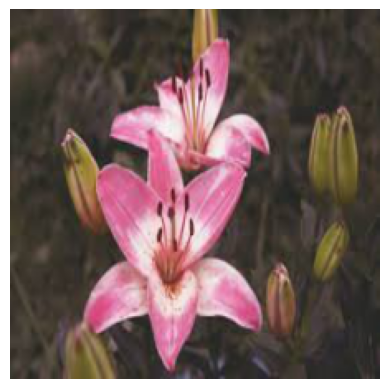

In [ ]:
# exemplo de uma imagem do nosso dataset

sample, label = dataset[0]
image_array = np.array(sample)
plt.imshow(image_array)
plt.axis('off')
plt.show()

### Modelagem da MobileNet:

#### Arquitetura da MobileNet:

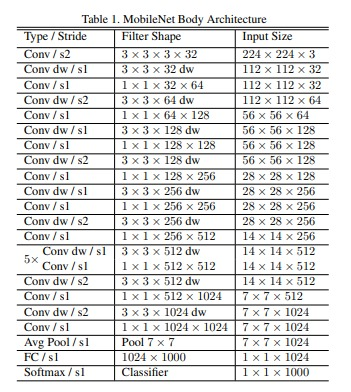

In [ ]:
# implementando a arquitetura MobileNet

class MobileNet(nn.Module):
  def __init__(self, dropout = True):
    super().__init__()

    self.dropout = dropout

    if self.dropout:
        self.drop1 = nn.Dropout(p=0.2)
        self.drop2 = nn.Dropout(p=0.2)

    self.conv1 = nn.Conv2d(in_channels = 3,
                           out_channels = 32,
                           kernel_size = (3,3),
                           stride=2,
                           padding=1)

    self.bn1 = nn.BatchNorm2d(32)
    self.act1 = nn.ReLU()

    self.deth_conv1 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, groups=32, stride=1 , padding=1)
    self.bn2 = nn.BatchNorm2d(32)
    self.act2 = nn.ReLU()

    self.point_conv1 = nn.Conv2d(32, 64, kernel_size=1)
    self.bn3 = nn.BatchNorm2d(64)
    self.act3 = nn.ReLU()

    self.deth_conv2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, groups=64, stride=2 , padding=1)
    self.bn4 = nn.BatchNorm2d(64)
    self.act4 = nn.ReLU()

    self.point_conv2 = nn.Conv2d(64, 128, kernel_size=1)
    self.bn5 = nn.BatchNorm2d(128)
    self.act5 = nn.ReLU()

    self.deth_conv3 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, groups=128, stride=1 , padding=1)
    self.bn6 = nn.BatchNorm2d(128)
    self.act6 = nn.ReLU()

    self.point_conv3 = nn.Conv2d(128, 128, kernel_size=1)
    self.bn7 = nn.BatchNorm2d(128)
    self.act7 = nn.ReLU()

    self.deth_conv4 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, groups=128, stride=2 , padding=1)
    self.bn8 = nn.BatchNorm2d(128)
    self.act8 = nn.ReLU()

    self.point_conv4 = nn.Conv2d(128, 256, kernel_size=1)
    self.bn9 = nn.BatchNorm2d(256)
    self.act9 = nn.ReLU()

    self.deth_conv5 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, groups=256, stride=1 , padding=1)
    self.bn10 = nn.BatchNorm2d(256)
    self.act10 = nn.ReLU()

    self.point_conv5 = nn.Conv2d(256, 256, kernel_size=1)
    self.bn11 = nn.BatchNorm2d(256)
    self.act11 = nn.ReLU()

    self.deth_conv6 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, groups=256, stride=2 , padding=1)
    self.bn12 = nn.BatchNorm2d(256)
    self.act12 = nn.ReLU()

    self.point_conv6 = nn.Conv2d(256, 512, kernel_size=1)
    self.bn13 = nn.BatchNorm2d(512)
    self.act13 = nn.ReLU()

    self.deth_conv7 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, groups=512, stride=1 , padding=1)
    self.bn14 = nn.BatchNorm2d(512)
    self.act14 = nn.ReLU()

    self.point_conv7 = nn.Conv2d(512, 512, kernel_size=1)
    self.bn15 = nn.BatchNorm2d(512)
    self.act15 = nn.ReLU()

    self.deth_conv8 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, groups=512, stride=1 , padding=1)
    self.bn16 = nn.BatchNorm2d(512)
    self.act16 = nn.ReLU()

    self.point_conv8 = nn.Conv2d(512, 512, kernel_size=1)
    self.bn17 = nn.BatchNorm2d(512)
    self.act17 = nn.ReLU()

    self.deth_conv9 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, groups=512, stride=1 , padding=1)
    self.bn18 = nn.BatchNorm2d(512)
    self.act18 = nn.ReLU()

    self.point_conv9 = nn.Conv2d(512, 512, kernel_size=1)
    self.bn19 = nn.BatchNorm2d(512)
    self.act19 = nn.ReLU()

    self.deth_conv10 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, groups=512, stride=1 , padding=1)
    self.bn20 = nn.BatchNorm2d(512)
    self.act20 = nn.ReLU()

    self.point_conv10 = nn.Conv2d(512, 512, kernel_size=1)
    self.bn21 = nn.BatchNorm2d(512)
    self.act21 = nn.ReLU()

    self.deth_conv11 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, groups=512, stride=1 , padding=1)
    self.bn22 = nn.BatchNorm2d(512)
    self.act22 = nn.ReLU()

    self.point_conv11 = nn.Conv2d(512, 512, kernel_size=1)
    self.bn23 = nn.BatchNorm2d(512)
    self.act23 = nn.ReLU()

    self.deth_conv12 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, groups=512, stride=2 , padding=1)
    self.bn24 = nn.BatchNorm2d(512)
    self.act24 = nn.ReLU()

    self.point_conv12 = nn.Conv2d(512, 1024, kernel_size=1)
    self.bn25 = nn.BatchNorm2d(1024)
    self.act25 = nn.ReLU()

    self.deth_conv13 = nn.Conv2d(in_channels=1024, out_channels=1024, kernel_size=3, groups=1024, stride=1 , padding=1) # stride = 2?
    self.bn26 = nn.BatchNorm2d(1024)
    self.act26 = nn.ReLU()

    self.point_conv13 = nn.Conv2d(1024, 1024, kernel_size=1)
    self.bn27 = nn.BatchNorm2d(1024)
    self.act27 = nn.ReLU()

    self.pool1 = nn.MaxPool2d(kernel_size=(7,7), stride=1)


    self.flat = nn.Flatten()
    self.fc1 = nn.Linear(1024, 512)
    self.act28 = nn.ReLU()
    self.fc2 = nn.Linear(512, 5)


  def forward(self, x):
    x = self.bn1(self.act1(self.conv1(x)))
    x = self.bn2(self.act2(self.deth_conv1(x)))

    x = self.bn3(self.act3(self.point_conv1(x)))
    x = self.bn4(self.act4(self.deth_conv2(x)))
    x = self.bn5(self.act5(self.point_conv2(x)))
    x = self.bn6(self.act6(self.deth_conv3(x)))

    x = self.bn7(self.act7(self.point_conv3(x)))
    x = self.bn8(self.act8(self.deth_conv4(x)))
    x = self.bn9(self.act9(self.point_conv4(x)))
    x = self.bn10(self.act10(self.deth_conv5(x)))

    x = self.bn11(self.act11(self.point_conv5(x)))
    x = self.bn12(self.act12(self.deth_conv6(x)))
    x = self.bn13(self.act13(self.point_conv6(x)))
    x = self.bn14(self.act14(self.deth_conv7(x)))

    x = self.bn15(self.act15(self.point_conv7(x)))
    x = self.bn16(self.act16(self.deth_conv8(x)))
    x = self.bn17(self.act17(self.point_conv8(x)))
    x = self.bn18(self.act18(self.deth_conv9(x)))

    x = self.bn19(self.act19(self.point_conv9(x)))
    x = self.bn20(self.act20(self.deth_conv10(x)))
    x = self.bn21(self.act21(self.point_conv10(x)))
    x = self.bn22(self.act22(self.deth_conv11(x)))

    x = self.bn23(self.act23(self.point_conv11(x)))
    x = self.bn24(self.act24(self.deth_conv12(x)))
    x = self.bn25(self.act25(self.point_conv12(x)))
    x = self.bn26(self.act26(self.deth_conv13(x)))

    x = self.bn27(self.act27(self.point_conv13(x)))
    x = self.pool1(x)

    x = self.flat(x)
    x = self.act28(self.fc1(x))
    x = self.fc2(x)

    return x

### Treinamento e validação:

In [ ]:
# definindo as funções de treino e teste

loss_fn = nn.CrossEntropyLoss()

def train(model, optimizer, train_loader):
    model.train()

    batch_loss = 0.0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device, non_blocking = True), labels.to(device, non_blocking = True)

        y_hat = model(inputs)
        loss = loss_fn(y_hat, labels)

        optimizer.zero_grad()

        loss.backward()
        optimizer.step()

        batch_loss += float(loss)

    train_loss = batch_loss / len(train_loader)

    return train_loss



def test(model, optimizer, test_loader):
    model.eval()

    batch_correct = 0
    batch_loss = 0.0

    for inputs, labels in test_loader:
        model.eval()
        inputs, labels = inputs.to(device, non_blocking = True), labels.to(device, non_blocking = True)

        with torch.no_grad():
            y_hat = model(inputs)
            loss = loss_fn(y_hat, labels)

        batch_loss += float(loss)
        batch_correct += (torch.argmax(y_hat,1) == labels).float().sum()

    test_loss = batch_loss/len(test_loader)
    test_acc = batch_correct/len(test_loader.dataset)

    return test_loss, test_acc



def train_n_epochs(model, optimizer, train_loader, val_loader, n_epochs):
    hist_loss_train = []
    hist_loss_validation = []
    acuracia = []

    for epoch in range(n_epochs):
        train_loss = train(model, optimizer, train_loader)
        val_loss, val_acc = test(model, optimizer, val_loader)

        hist_loss_train.append(train_loss)
        hist_loss_validation.append(val_loss)
        acuracia.append(val_acc)

        print(f"Epoch {epoch}: Train Loss: {train_loss:.2f} Validation Loss: {val_loss:.2f} Validation Accuracy: {val_acc:.2f}")

    return hist_loss_train, hist_loss_validation, acuracia

In [ ]:
# declarando o modelo

model = MobileNet()
model = model.to(device)

In [ ]:
# utilizamos o otimizador adam para o Learning Rate

optimizer = optim.Adam(model.parameters(), lr=1e-4)

In [ ]:
# treinando o nosso modelo para a base de dados das flores.

hist_loss_train, hist_loss_validation, hist_acc = train_n_epochs(model, optimizer, train_loader, test_loader, n_epochs = 100)

Epoch 0: Train Loss: 1.66 Validation Loss: 1.58 Validation Accuracy: 0.29
Epoch 1: Train Loss: 1.53 Validation Loss: 1.36 Validation Accuracy: 0.39
Epoch 2: Train Loss: 1.39 Validation Loss: 1.35 Validation Accuracy: 0.40
Epoch 3: Train Loss: 1.33 Validation Loss: 1.27 Validation Accuracy: 0.46
Epoch 4: Train Loss: 1.28 Validation Loss: 1.22 Validation Accuracy: 0.48
Epoch 5: Train Loss: 1.25 Validation Loss: 1.19 Validation Accuracy: 0.52
Epoch 6: Train Loss: 1.21 Validation Loss: 1.17 Validation Accuracy: 0.52
Epoch 7: Train Loss: 1.20 Validation Loss: 1.14 Validation Accuracy: 0.49
Epoch 8: Train Loss: 1.18 Validation Loss: 1.14 Validation Accuracy: 0.53
Epoch 9: Train Loss: 1.16 Validation Loss: 1.13 Validation Accuracy: 0.53
Epoch 10: Train Loss: 1.10 Validation Loss: 1.11 Validation Accuracy: 0.54
Epoch 11: Train Loss: 1.08 Validation Loss: 1.07 Validation Accuracy: 0.56
Epoch 12: Train Loss: 1.07 Validation Loss: 1.06 Validation Accuracy: 0.58
Epoch 13: Train Loss: 1.04 Validati

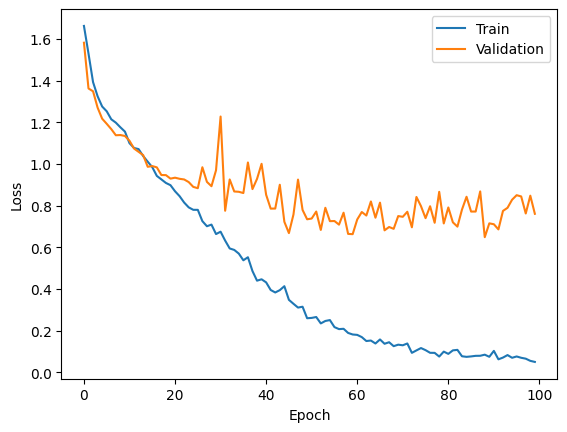

In [ ]:
# visualizando a loss de treino e a loss de validação

plt.figsize = (12, 4)

plt.plot(np.arange(len(hist_loss_train)), hist_loss_train, label='Train')
plt.plot(np.arange(len(hist_loss_validation)), hist_loss_validation, label='Validation')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
lista_float = [tensor.item() for tensor in hist_acc]

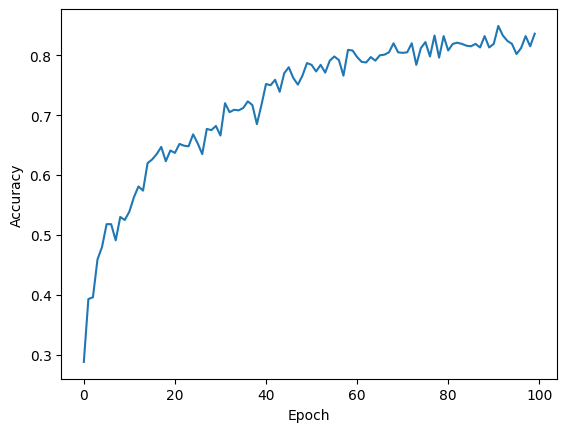

In [ ]:
# visualizando o crescimento da acurácia

plt.figsize = (12, 4)

plt.plot(np.arange(len(lista_float)), lista_float)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.show()

### Referências:

https://arxiv.org/pdf/1704.04861v1.pdf

https://paperswithcode.com/method/pointwise-convolution

https://paperswithcode.com/method/depthwise-separable-convolution